In [55]:
%pylab inline
%config Inline.Backend.figure_format = 'retina'

from __future__ import division, print_function
import gwmemory

Populating the interactive namespace from numpy and matplotlib


In [56]:
!pip install lalsuite 

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
%matplotlib inline

import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation

<type 'dict'>
['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']


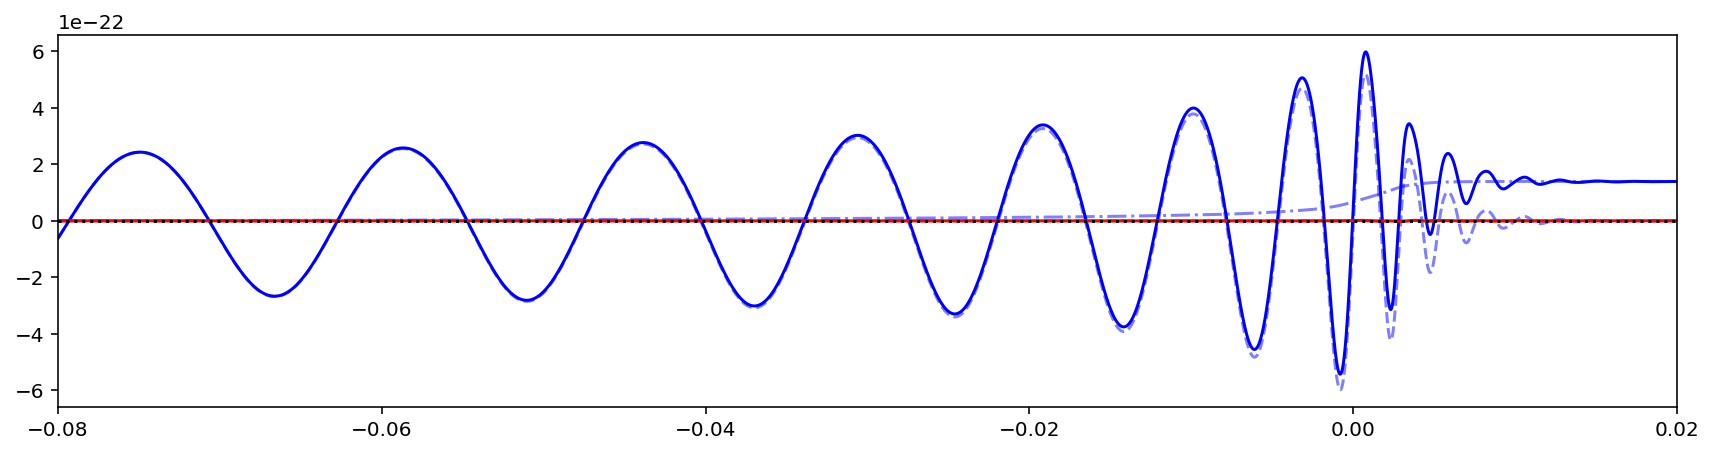

In [58]:
#In order to generate the memory we necessarily generate the time-domain oscillatory waveform
q = 1.
S1 = [0., 0., 0.]
S2 = [0., 0., 0.]

times = np.linspace(-0.08, 0.02, 10001)
surr = gwmemory.waveforms.Surrogate(q=q, S1=S1, S2=S2, MTot=41, distance=400, times=times)


inc = np.pi / 2
pol = 0

oscillatory, times = surr.time_domain_oscillatory(inc=inc, pol=pol)
memory, times = surr.time_domain_memory(inc=inc, pol=pol)

fig = figure(figsize=(12, 6))
fig.add_subplot(2, 1, 1)
plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
plot(times, oscillatory['plus'] + memory['plus'], color='b')
plot(times, oscillatory['cross'] + memory['cross'], color='r')
axhline(0, linestyle=':', color='k')
xlim(-0.08, 0.02)

print (type (oscillatory))

print (dir(surr.time_domain_oscillatory))


tight_layout()
show()
close()

In [59]:
# Generating waveforms for 10 solar mass BBH merger
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

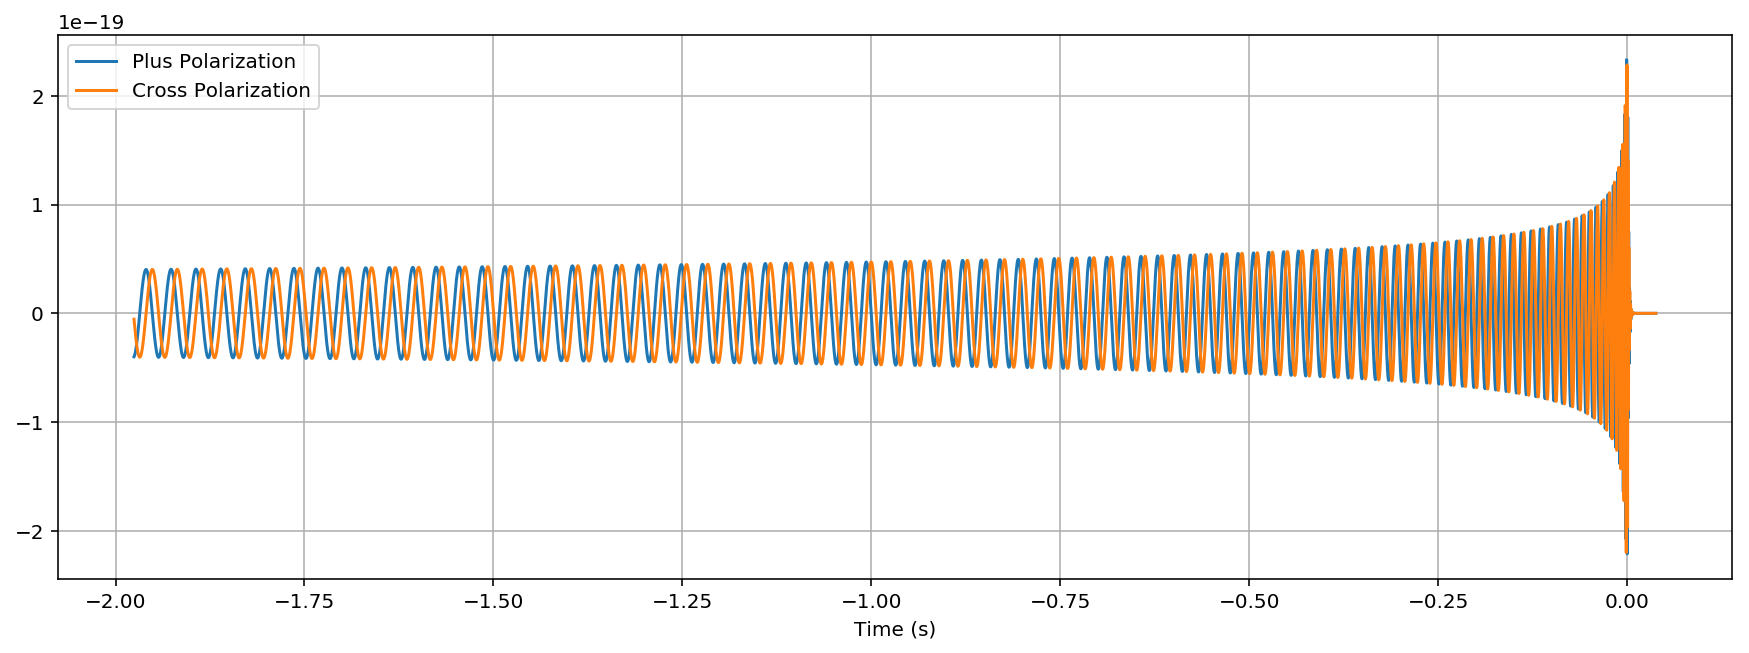

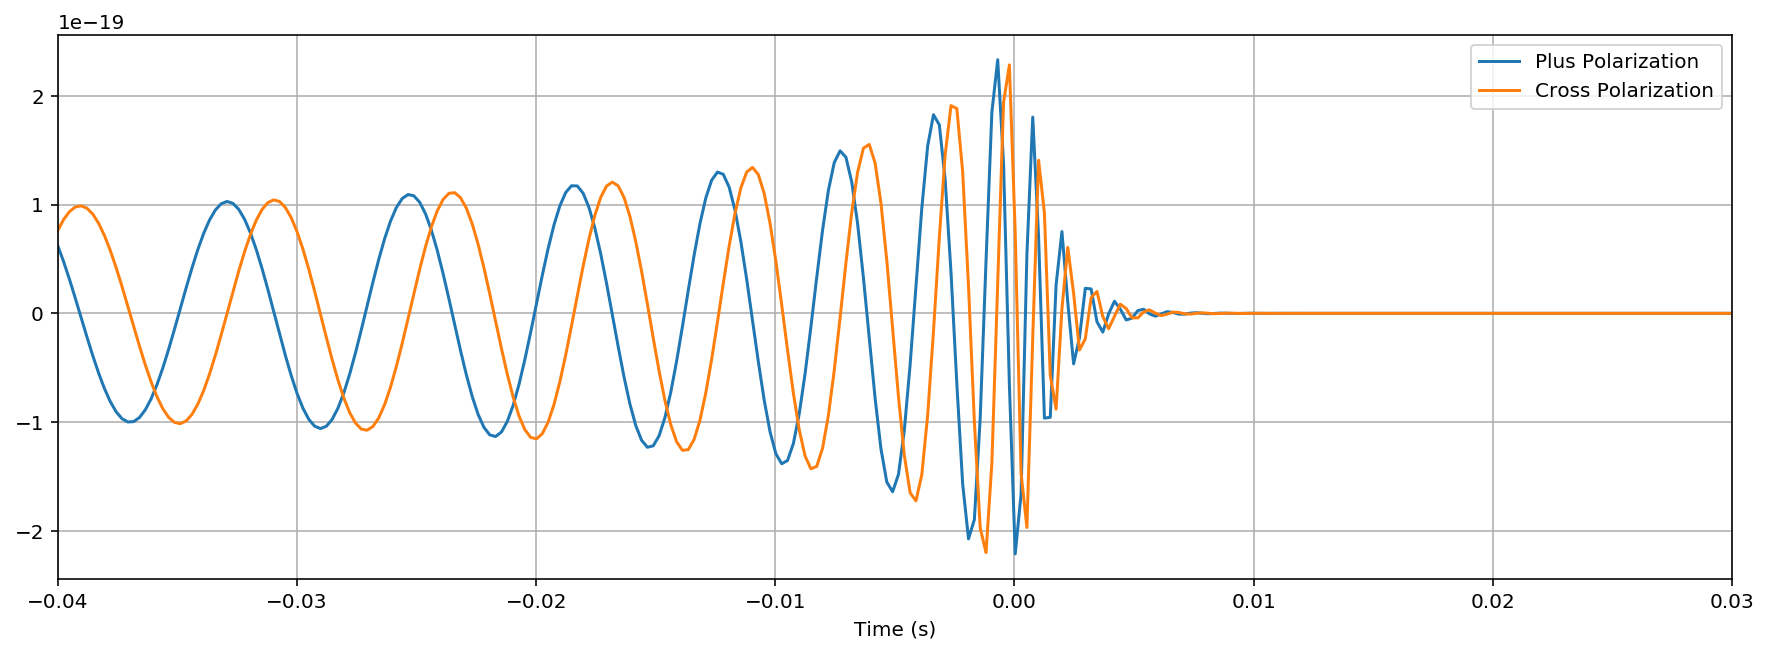

In [60]:
 # Plotting time series 
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

# Zooming in on merger
plt.figure(figsize=(15,5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-0.04, 0.03)
plt.legend()
plt.grid()

In [61]:
hp_f = hp.to_frequencyseries()
hc_f = hc.to_frequencyseries()

[  0.00000000e+00   4.96605238e-01   9.93210475e-01 ...,   2.04700679e+03
   2.04750339e+03   2.04800000e+03]


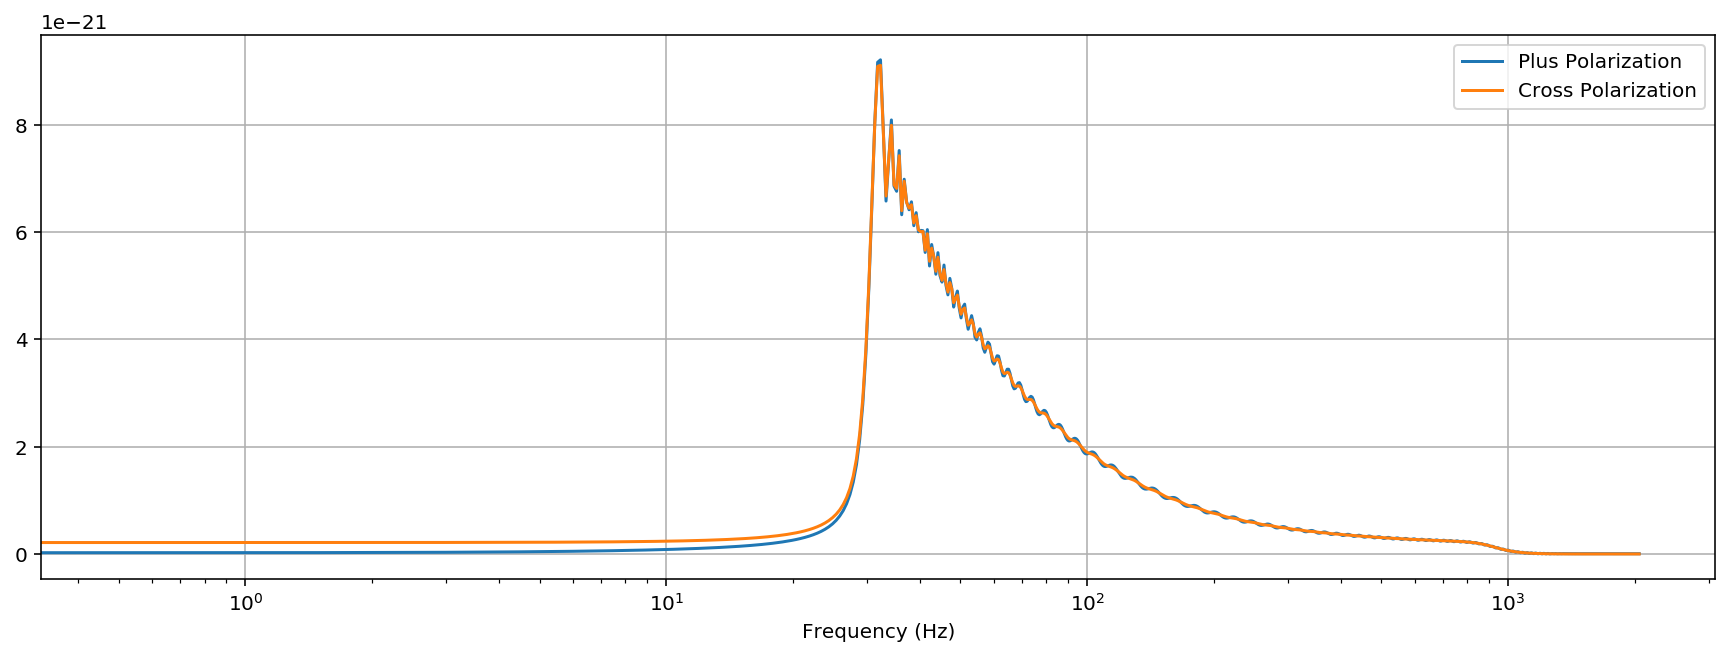

In [62]:
 # Plotting frequency series
plt.figure(figsize=(15,5))
plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

print (hp_f.sample_frequencies)

<class 'pycbc.types.timeseries.TimeSeries'>
0.0357142857143


Text(0.5,1,u'PSD')

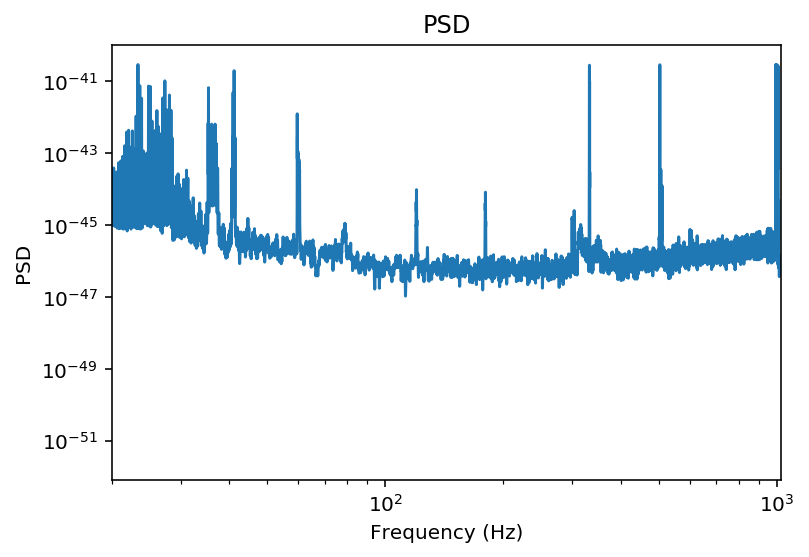

In [63]:
 #another attempt at making psd
merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048).crop(2, 2)
print (type (strain))

# Freq. bin size:
df = strain.delta_f
print (df)


# Sample rate:
samp_rate = 4096


# Upper and lower freq. limits
f_lower = 20.
f_upper = 1024


# Making PSD 
psd = strain.psd(4)
psd = interpolate(psd, df)
noise = inverse_spectrum_truncation(psd, 4 * samp_rate)

fs = noise.delta_f * np.arange(noise.data.size)

# Plotting noise curve
plt.loglog(fs, noise)
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("PSD")   

[  1.40536153e-26   1.50627481e-26   1.60083934e-26 ...,   6.43093929e-24
   5.89906511e-24   5.31422226e-24]
['__abs__', '__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__div__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getitem__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__isub__', '__len__', '__module__', '__mul__', '__new__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_checkother', '_copy', '_data', '_delta_f', '_epoch', '_getslice', '_getvalue', '_icheckother', '_memoize_single', '_return', '_returnarray', '_returntype', '_saved', '_scheme', '_swighelper', '_typecheck', '_vcheckother', '_vrcheckother', 'abs_arg_max', 'abs_max_loc', 'almost_equal_elem', 'almost_equal_norm', 'astype', 'clear', 'conj', 'copy', 'cumsum', 'cyclic_time_shift', 'data', 'delta_f', 'del

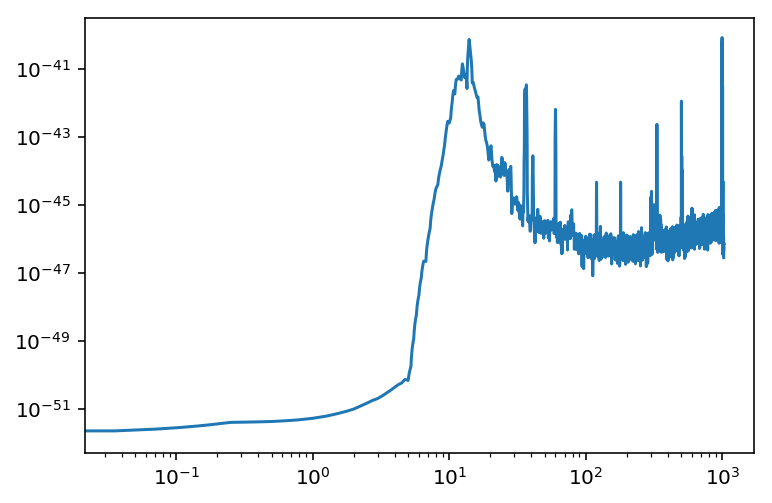

In [64]:
asd = np.sqrt(psd)
print (asd)

print(dir(psd))
print(psd.sample_frequencies)

plt.loglog(psd.sample_frequencies, psd)

Text(0.5,1,u'ASD')

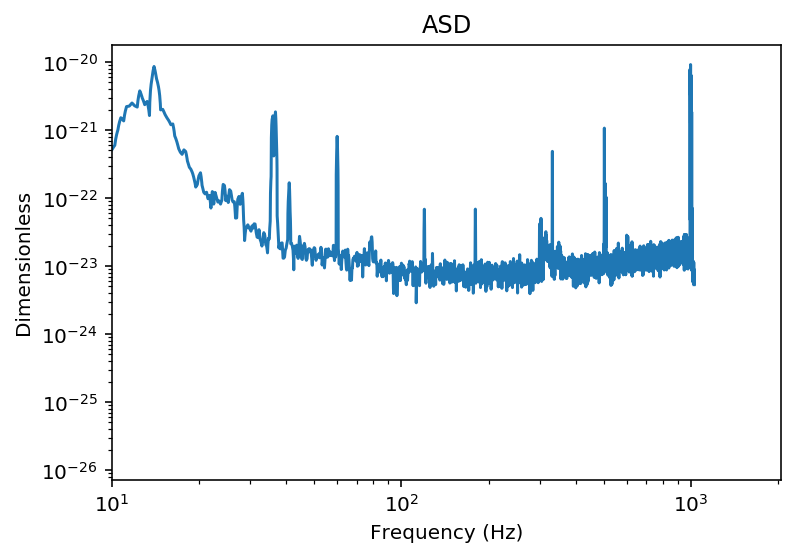

In [65]:
plt.loglog(fs,asd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Dimensionless")
pylab.xlim(10, 2048)

plt.title("ASD")


In [66]:

from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as np
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
times = np.linspace(-0.98, .01, 10000)

Help on function frequency_domain_memory in module gwmemory.gwmemory:

frequency_domain_memory(model=None, q=None, MTot=None, S1=None, S2=None, distance=None, inc=None, pol=None, **kwargs)
    Calculate the frequency domain memory waveform according to __reference__.
    
    Parameters
    ----------
    model: str
        Name of the model, this is used to identify waveform approximant, e.g., NRSur7dq2, IMRPhenomD, MWM, etc.
    h_lm: dict
        Spin weighted spherical harmonic decomposed time series.
        If this is specified these polarisations will be used.
    times: array
        time series corresponding to the h_lm.
    q: float
        Mass ratio of the binary being considered.
    MTot: float
        Total mass of the binary being considered in solar units.
    S1: array
        Dimensionless spin vector of the more massive black hole.
    S2: array
        Dimensionless spin vector of the less massive black hole.
    distance: float
        Distance to the binary in Mp

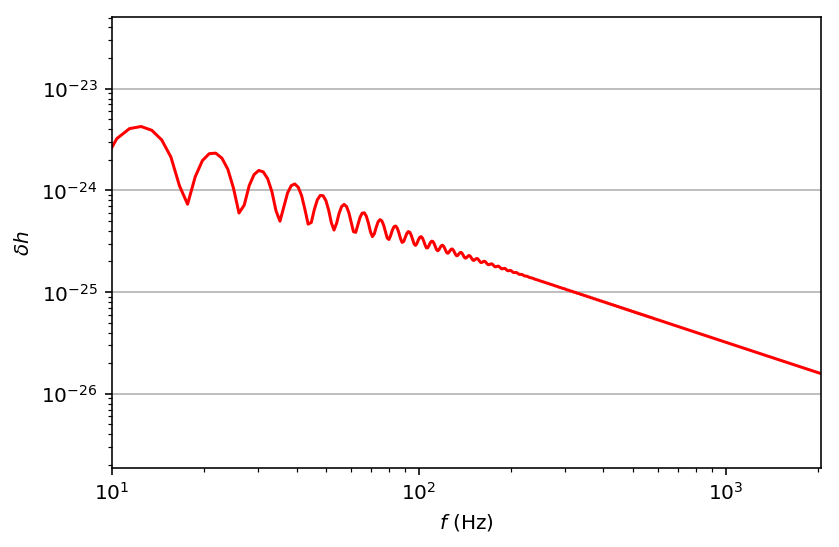

In [67]:

#creating memory waveform 
colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='SEOBNRv4', inc=np.pi/2, pol=0., times=times)

help(gwmemory.frequency_domain_memory)


print(frequencies)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label='SEOBNRv4')
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='b', label='SEOBNRv4')

print(frequencies)


    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 2048)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

[  0.00000000e+00   1.03920402e+00   2.07840804e+00 ...,   1.69161630e+04
   1.69172022e+04   1.69182414e+04]


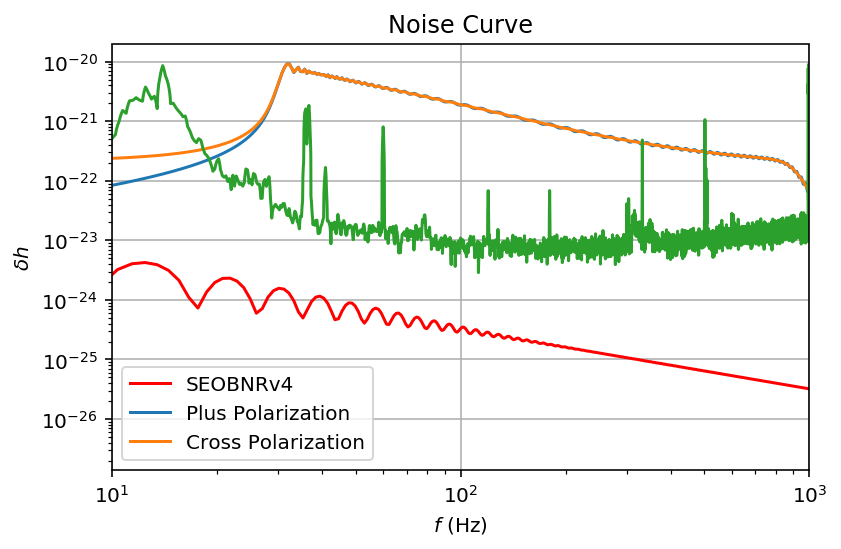

In [68]:

#Creating graph of the signal with the asd, memory, and oscillatory component combined
colours = ['r', 'b', 'g', 'k']

h_mem, frequencies = gwmemory.frequency_domain_memory(q=q, S1=S1, S2=S2, MTot=60., distance=400.,
                                                      model='SEOBNRv4', inc=np.pi/2, pol=0., times=times)


print(frequencies)
plt.figure()
plt.loglog(frequencies, abs(h_mem['plus']), linestyle='-', color='r', label='SEOBNRv4')
#plt.loglog(frequencies, abs(h_mem['cross']), linestyle='--', color='b', label='SEOBNRv4')


plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.semilogx(hp_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()

# Plotting noise curve
plt.xlim(f_lower, f_upper)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.title("Noise Curve")
pylab.xlim(10, 2048)

#plotting asd
plt.loglog(fs,asd)

#plot(asd, oscillatory['plus'] + memory['plus'], color='b')

    

xlabel('$f$ (Hz)')
ylabel('$\delta h$')

xlim(10, 1000)
#ylim(1e-27, 1e-23)

ax = plt.gca()
ax.grid(True, axis='y')

tight_layout()
show()
close()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc.filter.matchedfilter import match


In [70]:
from scipy.interpolate import interp1d

In [71]:
#Transforming memory and oscillatory into frequency domain

freqmem = np.fft.fft(memory['plus'])
help(gwmemory.waveforms.Surrogate)

freqosc = np.fft.fft(oscillatory['plus'])

Help on class Surrogate in module gwmemory.waveforms:

class Surrogate(MemoryGenerator)
 |  Memory generator for a numerical relativity surrogate.
 |  
 |  Attributes
 |  ----------
 |  name: str
 |      Name of file to extract waveform from.
 |  modes: dict
 |      Spherical harmonic modes which we have knowledge of, default is ell<=4.
 |  h_lm: dict
 |      Spherical harmonic decomposed time-domain strain.
 |  times: array
 |      Array on which waveform is evaluated.
 |  q: float
 |      Binary mass ratio
 |  MTot: float, optional
 |      Total binary mass in solar units.
 |  distance: float, optional
 |      Distance to the binary in Mpc.
 |  S1: array
 |      Spin vector of more massive black hole.
 |  S2: array
 |      Spin vector of less massive black hole.
 |  
 |  Method resolution order:
 |      Surrogate
 |      MemoryGenerator
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, q, name='', MTot=None, S1=None, S2=None, distance=None, LMax=4, mod

In [72]:

#Interpolating to make  memory and oscillatory component (in freq domain)and asd equal. This will line them up
asd_freq = asd #(data)
sampfreq = 4096
datafreq = np.fft.fftfreq(h_trial.size)*sampfreq
print(datafreq)
print(fs)
print(asd_freq)
interpolate_asd = np.interp(datafreq, fs, asd_freq)
#np.interp(np.abs(datafreq), freqs, data_psd)

[ 0.          0.40955904  0.81911809 ..., -1.22867713 -0.81911809
 -0.40955904]
[  0.00000000e+00   3.57142857e-02   7.14285714e-02 ...,   1.02392857e+03
   1.02396429e+03   1.02400000e+03]
[  1.40536153e-26   1.50627481e-26   1.60083934e-26 ...,   6.43093929e-24
   5.89906511e-24   5.31422226e-24]


In [73]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import h5py
import json

# the IPython magic below must be commented out in the .py file, since it doesn't work there.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [74]:
s = freqosc + freqmem

In [75]:
 #the noise weighted inner product
    # Function to calculate the noise weighted inner product of two vectors
# a and b (FFTs) with noise vector Sn (PSD); df = freq. bin size.a, b, and Sn must be same length
def InnerProduct(a, b, Sn, df):
    
    
    
    b_conj = np.conjugate(b)
    
    integrand = []
    
    for i in range(0,len(a)):
        intgrnd = a[i]*b_conj[i]/Sn[i]
        integrand.append(intgrnd)
            
    result_complex = 4*np.sum(integrand)*df
    
    result = np.real(result_complex)
    
    return result

In [76]:
 # Function to calculate the likelihood of data given parameters theta that
# generate strain h_theta (frequency series) with noise Sn (ASD); df = freq. bin size
#  h_theta, data, and Sn (ASD) must all be same length

def LogLikelihood(data, h_theta, Sn, df):
    
    h_minus_d = h_theta - data
    
    term = (-1.0/2)*InnerProduct(h_minus_d, h_minus_d, Sn, df)
    
    result = (term)

    return result

LogLikelihoodAnswer = LogLikelihood(s, h_trial, asd, df)
print (LogLikelihoodAnswer)

-9.11768190554e-11


In [77]:
#Template, adding in the lambda component. Will store log likelihood of the template
lambda_arr = np.arange(-10,10,.1)
like_arr = []
for weight in lambda_arr:
    h_trial = freqosc + weight*freqmem
    like_trial = LogLikelihood(h_trial, s, asd, df)
    like_arr.append(like_trial)

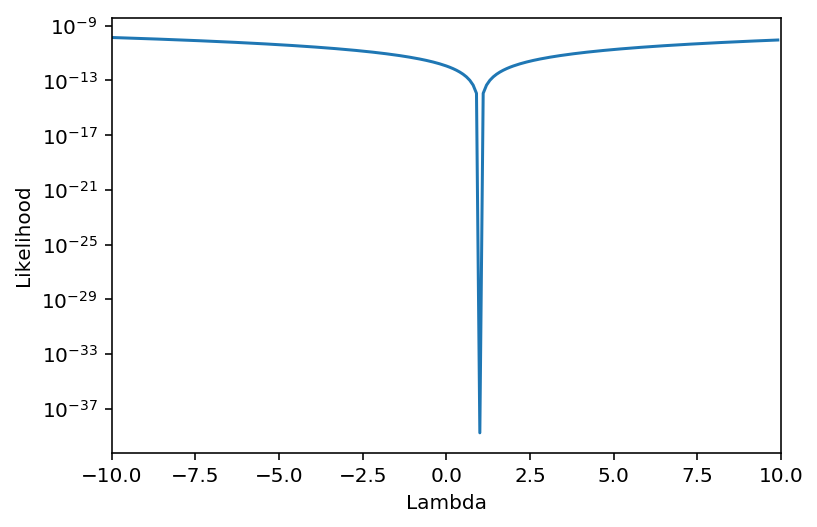

In [78]:
import pylab
import numpy

x = lambda_arr 
y = -1*np.array(like_arr)
pylab.semilogy(x,y) 
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(0, 10)
pylab.ylabel('Likelihood')

 
pylab.show() 